In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(trainX, trainY),(testX, testY) = mnist.load_data( )

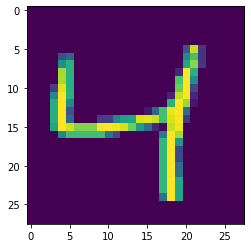

In [3]:
x = trainX[2]
plt.imshow(x)
plt.show()

# Preprocessing

In [4]:
def preprocessing(data, labels):
    data = np.reshape(data, newshape=(data.shape[0], data.shape[1], data.shape[2], 1))
    data = data / 255
    data = data.astype(dtype='float64')
    
    labels = to_categorical(labels, num_classes=10, dtype='float64')
    
    return data, labels

In [5]:
trainX, trainY = preprocessing(trainX, trainY)
testX, testY = preprocessing(testX, testY)

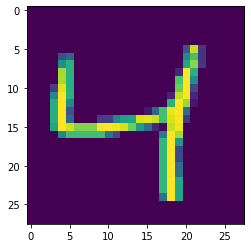

In [6]:
x = trainX[2]
plt.imshow(x)
plt.show()

# Implementation

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [8]:
def create_cnn(learning_rate=0.01):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())        
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(lr=learning_rate, momentum=0.9)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [10]:
cnn = create_cnn()

C:\Users\sidar\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [11]:
cnn.layers

In [12]:
cnn.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 13s 8ms/step - loss: 0.1777 - accuracy: 0.9454 - val_loss: 0.0639 - val_accuracy: 0.9817
Epoch 2/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0610 - accuracy: 0.9817 - val_loss: 0.0524 - val_accuracy: 0.9860
Epoch 3/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0389 - accuracy: 0.9886 - val_loss: 0.0559 - val_accuracy: 0.9852
Epoch 4/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.0475 - val_accuracy: 0.9880
Epoch 5/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0181 - accuracy: 0.9948 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 6/10
1688/1688 [==============================] - 13s 7ms/step - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0488 - val_accuracy: 0.9878
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0080 - accuracy: 0.9981 - val_loss: 0.0512 - val_ac

In [13]:
score = cnn.evaluate(testX, testY, verbose=0)
print(score)

[0.04158346354961395, 0.988099992275238]


# Experimentation

In [93]:
epoch_history = cnn.fit(trainX, trainY, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0016 - accuracy: 0.9998 - val_loss: 0.0502 - val_accuracy: 0.9893
Epoch 2/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.0523 - val_accuracy: 0.9895
Epoch 3/50
1688/1688 [==============================] - 13s 8ms/step - loss: 8.2430e-04 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 0.9890
Epoch 4/50
1688/1688 [==============================] - 13s 8ms/step - loss: 6.4579e-04 - accuracy: 1.0000 - val_loss: 0.0547 - val_accuracy: 0.9897
Epoch 5/50
1688/1688 [==============================] - 13s 8ms/step - loss: 5.4154e-04 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 0.9892
Epoch 6/50
1688/1688 [==============================] - 13s 8ms/step - loss: 4.5755e-04 - accuracy: 1.0000 - val_loss: 0.0560 - val_accuracy: 0.9893
Epoch 7/50
1688/1688 [==============================] - 12s 7ms/step - loss: 4.0050e-04 - accuracy: 1.0000 - val_l

In [97]:
def display(history):
    train_accuracy = history.history['accuracy']
    train_loss = history.history['loss']
    val_accuracy = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    x_values = list(range(0,len(train_accuracy)))
    
    plt.plot(x_values, train_accuracy, 'b-', label='Training Accuracy')
    plt.plot(x_values, val_accuracy, 'g-', label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    plt.plot(x_values, train_loss, 'b-', label='Training Loss')
    plt.plot(x_values, val_loss,'g-', label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss' )
    plt.legend()
    plt.show()

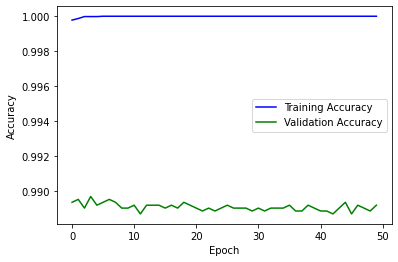

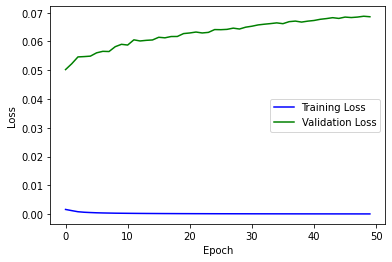

In [98]:
display(epoch_history)

In [103]:
def create_cnn_dropout(learning_rate=0.01):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())

    model.add(Dropout(0.5))
        
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(lr=learning_rate, momentum=0.9)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [104]:
cnn_dropout = create_cnn_dropout()

In [105]:
epoch_history_dropout = cnn_dropout.fit(trainX, trainY, batch_size=32, epochs=50, validation_split=0.1)

Epoch 1/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.2241 - accuracy: 0.9300 - val_loss: 0.0708 - val_accuracy: 0.9802
Epoch 2/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0890 - accuracy: 0.9727 - val_loss: 0.0459 - val_accuracy: 0.9883
Epoch 3/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0446 - val_accuracy: 0.9870
Epoch 4/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0541 - accuracy: 0.9826 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 5/50
1688/1688 [==============================] - 14s 8ms/step - loss: 0.0454 - accuracy: 0.9852 - val_loss: 0.0398 - val_accuracy: 0.9882
Epoch 6/50
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0401 - accuracy: 0.9868 - val_loss: 0.0412 - val_accuracy: 0.9895
Epoch 7/50
1688/1688 [==============================] - 13s 8ms/step - loss: 0.0323 - accuracy: 0.9892 - val_loss: 0.0371 - val_ac

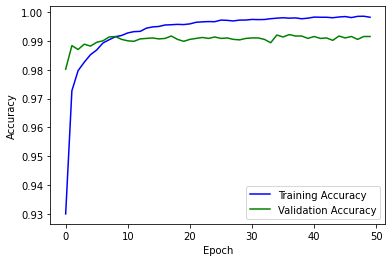

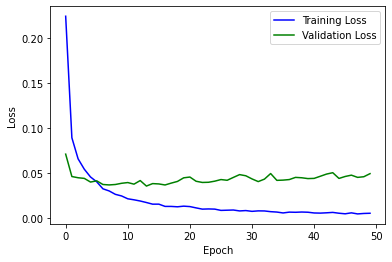

In [106]:
display(epoch_history_dropout)

In [110]:
def create_cnn_add(learning_rate=0.01):
    model = Sequential()
    model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())        
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    opt = SGD(lr=learning_rate, momentum=0.9)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [111]:
cnn_add = create_cnn_add()

In [112]:
cnn_add.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.1418 - accuracy: 0.9554 - val_loss: 0.0546 - val_accuracy: 0.9845
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0474 - accuracy: 0.9853 - val_loss: 0.0431 - val_accuracy: 0.9873
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0314 - accuracy: 0.9898 - val_loss: 0.0392 - val_accuracy: 0.9882
Epoch 4/10
1688/1688 [==============================] - 14s 9ms/step - loss: 0.0235 - accuracy: 0.9925 - val_loss: 0.0329 - val_accuracy: 0.9913
Epoch 5/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0323 - val_accuracy: 0.9918
Epoch 6/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0321 - val_accuracy: 0.9920
Epoch 7/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.0349 - val_a

In [113]:
score = cnn_add.evaluate(testX, testY, verbose=0)
print(score)

[0.027527863159775734, 0.9915000200271606]


In [114]:
cnn_low = create_cnn_add(learning_rate=0.001)

In [115]:
cnn_low.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.2822 - accuracy: 0.9162 - val_loss: 0.1076 - val_accuracy: 0.9730
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1045 - accuracy: 0.9690 - val_loss: 0.0691 - val_accuracy: 0.9822
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 0.0564 - val_accuracy: 0.9847
Epoch 4/10
1688/1688 [==============================] - 16s 9ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0529 - val_accuracy: 0.9863
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0522 - accuracy: 0.9846 - val_loss: 0.0483 - val_accuracy: 0.9872
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0459 - accuracy: 0.9862 - val_loss: 0.0535 - val_accuracy: 0.9848
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0470 - val_ac

In [116]:
score = cnn_low.evaluate(testX, testY, verbose=0)
print(score)

[0.03898925334215164, 0.9871000051498413]


In [117]:
cnn_high = create_cnn_add(learning_rate=0.1)

In [118]:
cnn_high.fit(trainX, trainY, batch_size=32, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 17s 10ms/step - loss: 0.3498 - accuracy: 0.9074 - val_loss: 0.3094 - val_accuracy: 0.9237
Epoch 2/10
1688/1688 [==============================] - 15s 9ms/step - loss: 1.4909 - accuracy: 0.4775 - val_loss: 2.3095 - val_accuracy: 0.1000
Epoch 3/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.3087 - accuracy: 0.1057 - val_loss: 2.3098 - val_accuracy: 0.0915
Epoch 4/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.3078 - accuracy: 0.1077 - val_loss: 2.3054 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.3079 - accuracy: 0.1038 - val_loss: 2.3069 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.3081 - accuracy: 0.1053 - val_loss: 2.3055 - val_accuracy: 0.0978
Epoch 7/10
1688/1688 [==============================] - 15s 9ms/step - loss: 2.3084 - accuracy: 0.1046 - val_loss: 2.3153 - val_a

In [120]:
score = cnn_high.evaluate(testX, testY, verbose=0)
print(score)

[2.31148624420166, 0.11349999904632568]
